# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
import seaborn as sns#импортируем библиотеку seaborn

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

54

In [16]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [17]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [23]:
debt_grouped = data.groupby('children').agg({'debt':['count','sum']})#посчитаем общее количество людей для каждой категории по количеству детей и количество людей, имеющих задолженность по этой категории
debt_grouped

debt      
          count   sum
children             
0         14107  1063
1          4809   444
2          2052   194
3           330    27
4            41     4
5             9     0

In [24]:
debt_grouped['existing_debt']=round((debt_grouped['debt']['sum']/debt_grouped['debt']['count']*100),2) #узнаем, какой процент от общего количества людей с определенным количеством детей имеет задолженность
debt_grouped

debt       existing_debt
          count   sum              
children                           
0         14107  1063          7.54
1          4809   444          9.23
2          2052   194          9.45
3           330    27          8.18
4            41     4          9.76
5             9     0          0.00

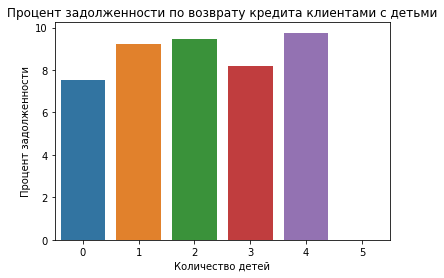

In [25]:
ax = sns.barplot(x=list(data['children'].sort_values(ascending=True).unique()), y=debt_grouped['existing_debt'])#строим столбчатую диаграмму, которая отображает зависимость задолженности от количества детей
ax.set_title('Процент задолженности по возврату кредита клиентами с детьми')
ax.set_xlabel('Количество детей')
ax.set_ylabel('Процент задолженности');

**Вывод:** 

Если сравнить процент задолженности по возврату кредита для людей, имеющих 1-4 ребенка и не имеющих детей, то можно сказать, что зависимость между количеством детей и возвратом кредита в срок действительно есть. У людей, не имеющих детей, процент задолженности ниже, чем у людей с детьми, значит они быстрее возвращают кредит.

В нашем исследовании также оказалось, что люди, у которых 5 детей, все возвращают кредит в срок, но этих людей очень мало.Возможно, нужна выборка больше.

А вот у людей, имеющих 3 ребенка, процент по задолженности ниже, чем у людей, у которых 1 или 2 ребенка.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [26]:
family_debt_grouped= data.groupby('family_status', as_index=False).agg({'debt':['count','sum']})#посчитаем общее количество людей для каждой категории по семейному положению и количество людей, имеющих задолженность по данной категории 
family_debt_grouped

family_status   debt     
                          count  sum
0  Не женат / не замужем   2796  273
1              в разводе   1189   84
2         вдовец / вдова    951   63
3       гражданский брак   4146  385
4        женат / замужем  12266  927

In [27]:
family_debt_grouped['percent_debt']=round((family_debt_grouped['debt']['sum']/family_debt_grouped['debt']['count']*100),2)#узнаем, какой процент от общего количества людей с определенным семейным положением имеет задолженность
family_debt_grouped

family_status   debt      percent_debt
                          count  sum             
0  Не женат / не замужем   2796  273         9.76
1              в разводе   1189   84         7.06
2         вдовец / вдова    951   63         6.62
3       гражданский брак   4146  385         9.29
4        женат / замужем  12266  927         7.56

In [28]:
family_debt_grouped=family_debt_grouped.sort_values(by='percent_debt',ascending=False,ignore_index=True)#отсортируем данные датафрейма по убыванию значений столбца 'percent_debt'
family_debt_grouped

family_status   debt      percent_debt
                          count  sum             
0  Не женат / не замужем   2796  273         9.76
1       гражданский брак   4146  385         9.29
2        женат / замужем  12266  927         7.56
3              в разводе   1189   84         7.06
4         вдовец / вдова    951   63         6.62

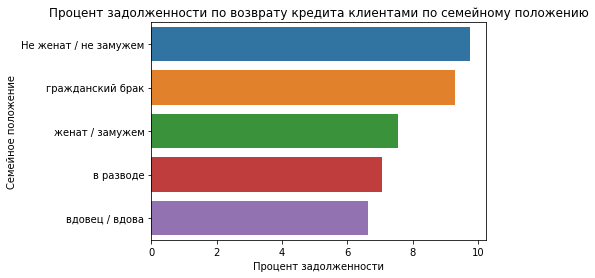

In [29]:
ax = sns.barplot(x=family_debt_grouped['percent_debt'], y=list(family_debt_grouped['family_status']))#строим столбчатую диаграмму, которая отображает зависимость задолженности от семейного положения
ax.set_title('Процент задолженности по возврату кредита клиентами по семейному положению')
ax.set_ylabel('Семейное положение')
ax.set_xlabel('Процент задолженности');

**Вывод:** Зависимость между семейным положением и возвратом кредита в срок тоже существует. Быстрее всех в срок возвращают кредит вдовы и вдовцы. Дольше всех отдают кредит те, кто не женат или не замужем.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [30]:
income_debt_grouped= data.groupby('total_income_category',as_index=False).agg({'debt':['count','sum']})#посчитаем общее количество людей для каждой категории по уровню дохода и количество людей, имеющих задолженность по данной категории 
income_debt_grouped

total_income_category   debt      
                         count   sum
0                     A     25     2
1                     B   5014   354
2                     C  15938  1353
3                     D    349    21
4                     E     22     2

In [31]:
income_debt_grouped['income_percent_debt']=round((income_debt_grouped['debt']['sum']/income_debt_grouped['debt']['count']*100),2)#узнаем, какой процент от общего количества людей с определенным уровнем дохода имеет задолженность
income_debt_grouped

total_income_category   debt       income_percent_debt
                         count   sum                    
0                     A     25     2                8.00
1                     B   5014   354                7.06
2                     C  15938  1353                8.49
3                     D    349    21                6.02
4                     E     22     2                9.09

In [32]:
income_debt_grouped=income_debt_grouped.sort_values(by='income_percent_debt',ascending=False,ignore_index=True)#отсортируем данные датафрейма по убыванию значений столбца 'income_percent_debt'
income_debt_grouped

total_income_category   debt       income_percent_debt
                         count   sum                    
0                     E     22     2                9.09
1                     C  15938  1353                8.49
2                     A     25     2                8.00
3                     B   5014   354                7.06
4                     D    349    21                6.02

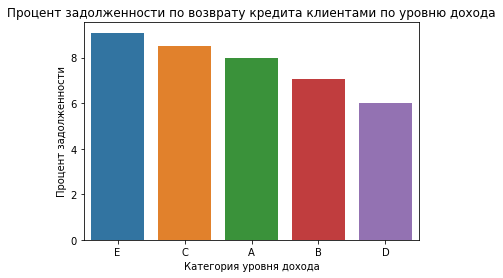

In [33]:
ax = sns.barplot(x=income_debt_grouped['total_income_category'], y=income_debt_grouped['income_percent_debt'])#строим столбчатую диаграмму, которая отображает зависимость задолженности от уровня дохода
ax.set_title('Процент задолженности по возврату кредита клиентами по уровню дохода')
ax.set_xlabel('Категория уровня дохода')
ax.set_ylabel('Процент задолженности');

**Вывод:** 
Зависимости между уровнем дохода и возвратом кредита в срок не наблюдается, так как у людей с маленьким, средним, высоким уровнем дохода как высокий процент задолженности по кредиту, так и низкий.

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [34]:
purpose_debt_grouped=data.groupby(['purpose_category'],as_index=False).agg({'debt':['count','sum']})#посчитаем общее количество людей для каждой категории по цели кредита и количество людей, имеющих задолженность по данной категории 
purpose_debt_grouped

purpose_category   debt     
                             count  sum
0    операции с автомобилем   4281  400
1  операции с недвижимостью  10754  780
2     получение образования   3989  369
3        проведение свадьбы   2324  183

In [35]:
purpose_debt_grouped['purpose_percent_debt']=round((purpose_debt_grouped['debt']['sum']/purpose_debt_grouped['debt']['count'])*100,2)#узнаем, какой процент от общего количества людей с определенной целью кредита имеет задолженность
purpose_debt_grouped

purpose_category   debt      purpose_percent_debt
                             count  sum                     
0    операции с автомобилем   4281  400                 9.34
1  операции с недвижимостью  10754  780                 7.25
2     получение образования   3989  369                 9.25
3        проведение свадьбы   2324  183                 7.87

In [36]:
purpose_debt_grouped=purpose_debt_grouped.sort_values(by='purpose_percent_debt', ascending=False, ignore_index=True)#отсортируем данные датафрейма по убыванию значений столбца 'purpose_percent_debt'
purpose_debt_grouped

purpose_category   debt      purpose_percent_debt
                             count  sum                     
0    операции с автомобилем   4281  400                 9.34
1     получение образования   3989  369                 9.25
2        проведение свадьбы   2324  183                 7.87
3  операции с недвижимостью  10754  780                 7.25

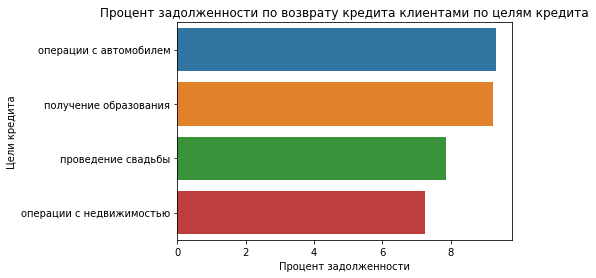

In [37]:
ax = sns.barplot(x=purpose_debt_grouped['purpose_percent_debt'], y=purpose_debt_grouped['purpose_category'])#строим столбчатую диаграмму, которая отображает зависимость задолженности от цели кредита
ax.set_title('Процент задолженности по возврату кредита клиентами по целям кредита')
ax.set_ylabel('Цели кредита')
ax.set_xlabel('Процент задолженности');

**Вывод:** Цели кредита влияют на возврат в срок этого кредита таким образом, что кредиты на свадьбу и недвижимость возвращаются быстрее, чем кредиты на автомобиль и образование.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* Возможными причинами появления пропусков в исходных данных могли быть:
1. Человеческий фактор (вовремя не занесли необходимые данные, случайно пропустили);
2. Техническая ошибка;
3. Отсутствие данных.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Медианное значение корректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. По нему мы получаем более объективную информацию, чем по среднему значению.

## Общий вывод.

На основании проведенного исследования можем сделать вывод, что на возврат кредита в срок влияет наличие детей у людей. Бездетные быстрее возвращают кредит, чем те, у кого есть 1-4 ребенка. А для людей с 5 детьми нужна выборка больше. 

Также быстрее всех возвращают кредит вдовы, вдовцы; люди, кто берет кредит на свадьбу или недвижимость. А дольше всех возвращают кредит те, кто не женат или не замужем; кто берет кредит на автомобиль или образование.

А вот зависимости между уровнем дохода и возвратом кредита в срок не наблюдается. У людей с маленьким, средним или высоким уровнем дохода как высокий процент задолженности по кредиту, так и низкий.